<a href="https://colab.research.google.com/github/chaimae-kouara/SehaChain/blob/main/Calories_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [ ]:


!pip install kaggle



In [ ]:
import os 
os.environ['KAGGLE_USERNAME']='chaimaekouara'
os.environ['KAGGLE_KEY']='db9350d801ef112428eff62230426f97'

In [ ]:
!kaggle datasets download -d kmader/food41


100% 5.29G/5.30G [01:52<00:00, 24.4MB/s]
100% 5.30G/5.30G [01:52<00:00, 50.4MB/s]


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/food41.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/images')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/images"))
file_count = len(files)

['sushi', 'pho', 'risotto', 'sashimi', 'pork_chop', 'strawberry_shortcake', 'Rghaif', 'foie_gras', 'deviled_eggs', 'nachos', 'fried_rice', 'pancakes', 'edamame', 'cannoli', 'breakfast_burrito', 'Poulet_rôti', 'fried_calamari', 'fish_and_chips', 'miso_soup', 'caprese_salad', 'spaghetti_carbonara', 'prime_rib', 'chicken_quesadilla', 'Mechoui', 'churros', 'dumplings', 'paella', 'ramen', 'escargots', 'spring_rolls', 'samosa', 'beet_salad', 'french_toast', 'pizza', 'beignets', 'gnocchi', 'club_sandwich', 'french_onion_soup', 'Tajine', 'grilled_cheese_sandwich', 'tiramisu', 'seaweed_salad', 'oysters', 'beef_tartare', 'ceviche', 'baklava', 'chicken_wings', 'Cornes_de_gazelle', 'macaroni_and_cheese', 'hot_and_sour_soup', 'guacamole', 'waffles', '.ipynb_checkpoints', 'greek_salad', 'donuts', 'macarons', 'shrimp_and_grits', 'ravioli', 'hamburger', 'spaghetti_bolognese', 'steak', 'hummus', 'Harcha', 'baby_back_ribs', 'omelette', 'lobster_bisque', 'chocolate_cake', 'chicken_curry', 'crab_cakes', '

In [ ]:
# Make new base directory
original_dataset_dir = '/content/images'
base_dir = '/content/FoodData/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [ ]:
#Under train folder create sub folders 


#train_apple_pie_dir = os.path.join(train_dir, 'apple_pie')
#os.mkdir(train_apple_pie_dir)

#train_baby_back_ribs_dir = os.path.join(train_dir, 'baby_back_ribs')
#os.mkdir(train_baby_back_ribs_dir)

train_baklava_dir = os.path.join(train_dir, 'baklava')
os.mkdir(train_baklava_dir)

#train_beef_carpaccio_dir = os.path.join(train_dir, 'beef_carpaccio')
#os.mkdir(train_beef_carpaccio_dir)

#train_beef_tartare_dir = os.path.join(train_dir, 'beef_tartare')
#os.mkdir(train_beef_tartare_dir)
#
#train_beet_salad_dir = os.path.join(train_dir, 'beet_salad')
#os.mkdir(train_beet_salad_dir)

#train_beignets_dir = os.path.join(train_dir, 'beignets')
#os.mkdir(train_beignets_dir)

#train_bibimbap_dir = os.path.join(train_dir, 'bibimbap')
#os.mkdir(train_bibimbap_dir)

#train_bread_pudding_dir = os.path.join(train_dir, 'bread_pudding')
#os.mkdir(train_bread_pudding_dir)

#train_breakfast_burrito_dir = os.path.join(train_dir, 'breakfast_burrito')
#os.mkdir(train_breakfast_burrito_dir)
#
#train_bruschetta_dir = os.path.join(train_dir, 'bruschetta')
#os.mkdir(train_bruschetta_dir)

train_caesar_salad_dir = os.path.join(train_dir, 'caesar_salad')
os.mkdir(train_caesar_salad_dir)

#train_cannoli_dir = os.path.join(train_dir, 'cannoli')
#os.mkdir(train_cannoli_dir)

#train_caprese_salad_dir = os.path.join(train_dir, 'caprese_salad')
#os.mkdir(train_caprese_salad_dir)

#train_carrot_cake_dir = os.path.join(train_dir, 'carrot_cake')
#os.mkdir(train_carrot_cake_dir)
#
#train_ceviche_dir = os.path.join(train_dir, 'ceviche')
#os.mkdir(train_ceviche_dir)

train_cheesecake_dir = os.path.join(train_dir, 'cheesecake')
os.mkdir(train_cheesecake_dir)

#train_cheese_plate_dir = os.path.join(train_dir, 'cheese_plate')
#os.mkdir(train_cheese_plate_dir)

#train_chicken_curry_dir = os.path.join(train_dir, 'chicken_curry')
#os.mkdir(train_chicken_curry_dir)

#train_chicken_quesadilla_dir = os.path.join(train_dir, 'chicken_quesadilla')
#os.mkdir(train_chicken_quesadilla_dir)
#
#train_chicken_wings_dir = os.path.join(train_dir, 'chicken_wings')
#os.mkdir(train_chicken_wings_dir)

train_chocolate_cake_dir = os.path.join(train_dir, 'chocolate_cake')
os.mkdir(train_chocolate_cake_dir)

#train_chocolate_mousse_dir = os.path.join(train_dir, 'chocolate_mousse')
#os.mkdir(train_chocolate_mousse_dir)

#train_churros_dir = os.path.join(train_dir, 'churros')
#os.mkdir(train_churros_dir)

#train_clam_chowder_dir = os.path.join(train_dir, 'clam_chowder')
#os.mkdir(train_clam_chowder_dir)
#
#train_club_sandwich_dir = os.path.join(train_dir, 'club_sandwich')
#os.mkdir(train_club_sandwich_dir)

#train_crab_cakes_dir = os.path.join(train_dir, 'crab_cakes')
#os.mkdir(train_crab_cakes_dir)

#train_creme_brulee_dir = os.path.join(train_dir, 'creme_brulee')
#os.mkdir(train_creme_brulee_dir)

#train_croque_madame_dir = os.path.join(train_dir, 'croque_madame')
#os.mkdir(train_croque_madame_dir)

train_cup_cakes_dir = os.path.join(train_dir, 'cup_cakes')
os.mkdir(train_cup_cakes_dir)
##
#train_deviled_eggs_dir = os.path.join(train_dir, 'deviled_eggs')
#os.mkdir(train_deviled_eggs_dir)

train_donuts_dir = os.path.join(train_dir, 'donuts')
os.mkdir(train_donuts_dir)

#train_dumplings_dir = os.path.join(train_dir, 'dumplings')
#os.mkdir(train_dumplings_dir)

#train_edamame_dir = os.path.join(train_dir, 'edamame')
#os.mkdir(train_edamame_dir)

#train_eggs_benedict_dir = os.path.join(train_dir, 'eggs_benedict')
#os.mkdir(train_eggs_benedict_dir)
##
#train_escargots_dir = os.path.join(train_dir, 'escargots')
#os.mkdir(train_escargots_dir)

#train_falafel_dir = os.path.join(train_dir, 'falafel')
#os.mkdir(train_falafel_dir)

#train_filet_mignon_dir = os.path.join(train_dir, 'filet_mignon')
#os.mkdir(train_filet_mignon_dir)

train_fish_and_chips_dir = os.path.join(train_dir, 'fish_and_chips')
os.mkdir(train_fish_and_chips_dir)

train_foie_gras_dir = os.path.join(train_dir, 'foie_gras')
os.mkdir(train_foie_gras_dir)
##
train_french_fries_dir = os.path.join(train_dir, 'french_fries')
os.mkdir(train_french_fries_dir)

#train_french_onion_soup_dir = os.path.join(train_dir, 'french_onion_soup')
#os.mkdir(train_french_onion_soup_dir)

train_french_toast_dir = os.path.join(train_dir, 'french_toast')
os.mkdir(train_french_toast_dir)

#train_fried_calamari_dir = os.path.join(train_dir, 'fried_calamari')
#os.mkdir(train_fried_calamari_dir)

#train_fried_rice_dir = os.path.join(train_dir, 'fried_rice')
#os.mkdir(train_fried_rice_dir)
##
train_frozen_yogurt_dir = os.path.join(train_dir, 'frozen_yogurt')
os.mkdir(train_frozen_yogurt_dir)

#train_garlic_bread_dir = os.path.join(train_dir, 'garlic_bread')
#os.mkdir(train_garlic_bread_dir)

#train_gnocchi_dir = os.path.join(train_dir, 'gnocchi')
#os.mkdir(train_gnocchi_dir)

#train_greek_salad_dir = os.path.join(train_dir, 'greek_salad')
#os.mkdir(train_greek_salad_dir)

#train_grilled_cheese_sandwich_dir = os.path.join(train_dir, 'grilled_cheese_sandwich')
#os.mkdir(train_grilled_cheese_sandwich_dir)
##
train_grilled_salmon_dir = os.path.join(train_dir, 'grilled_salmon')
os.mkdir(train_grilled_salmon_dir)

#train_guacamole_dir = os.path.join(train_dir, 'guacamole')
#os.mkdir(train_guacamole_dir)

#train_gyoza_dir = os.path.join(train_dir, 'gyoza')
#os.mkdir(train_gyoza_dir)

train_hamburger_dir = os.path.join(train_dir, 'hamburger')
os.mkdir(train_hamburger_dir)

#train_hot_and_sour_soup_dir = os.path.join(train_dir, 'hot_and_sour_soup')
 #os.mkdir(train_hot_and_sour_soup_dir)
##
train_hot_dog_dir = os.path.join(train_dir, 'hot_dog')
os.mkdir(train_hot_dog_dir)

#train_huevos_rancheros_dir = os.path.join(train_dir, 'huevos_rancheros')
#os.mkdir(train_huevos_rancheros_dir)

#train_hummus_dir = os.path.join(train_dir, 'hummus')
#os.mkdir(train_hummus_dir)

train_ice_cream_dir = os.path.join(train_dir, 'ice_cream')
os.mkdir(train_ice_cream_dir)

train_lasagna_dir = os.path.join(train_dir, 'lasagna')
os.mkdir(train_lasagna_dir)
##
#train_lobster_bisque_dir = os.path.join(train_dir, 'lobster_bisque')
#os.mkdir(train_lobster_bisque_dir)

#train_lobster_roll_sandwich_dir = os.path.join(train_dir, 'lobster_roll_sandwich')
#os.mkdir(train_lobster_roll_sandwich_dir)

#train_macaroni_and_cheese_dir = os.path.join(train_dir, 'macaroni_and_cheese')
#os.mkdir(train_macaroni_and_cheese_dir)

train_macarons_dir = os.path.join(train_dir, 'macarons')
os.mkdir(train_macarons_dir)

#train_miso_soup_dir = os.path.join(train_dir, 'miso_soup')
#os.mkdir(train_miso_soup_dir)
##
#train_mussels_dir = os.path.join(train_dir, 'mussels')
#os.mkdir(train_mussels_dir)

#train_nachos_dir = os.path.join(train_dir, 'nachos')
#os.mkdir(train_nachos_dir)

train_omelette_dir = os.path.join(train_dir, 'omelette')
os.mkdir(train_omelette_dir)

#train_onion_rings_dir = os.path.join(train_dir, 'onion_rings')
#os.mkdir(train_onion_rings_dir)

#train_oysters_dir = os.path.join(train_dir, 'oysters')
#os.mkdir(train_oysters_dir)
##
#train_pad_thai_dir = os.path.join(train_dir, 'pad_thai')
#os.mkdir(train_pad_thai_dir)

train_paella_dir = os.path.join(train_dir, 'paella')
os.mkdir(train_paella_dir)

train_pancakes_dir = os.path.join(train_dir, 'pancakes')
os.mkdir(train_pancakes_dir)

#train_panna_cotta_dir = os.path.join(train_dir, 'panna_cotta')
#os.mkdir(train_panna_cotta_dir)

#train_peking_duck_dir = os.path.join(train_dir, 'peking_duck')
#os.mkdir(train_peking_duck_dir)
##
#train_pho_dir = os.path.join(train_dir, 'pho')
#os.mkdir(train_pho_dir)

train_pizza_dir = os.path.join(train_dir, 'pizza')
os.mkdir(train_pizza_dir)

#train_pork_chop_dir = os.path.join(train_dir, 'pork_chop')
#os.mkdir(train_pork_chop_dir)
train_poutine_dir = os.path.join(train_dir, 'poutine')
os.mkdir(train_poutine_dir)

#train_prime_rib_dir = os.path.join(train_dir, 'prime_rib')
#os.mkdir(train_prime_rib_dir)
##
#train_pulled_pork_sandwich_dir = os.path.join(train_dir, 'pulled_pork_sandwich')
#os.mkdir(train_pulled_pork_sandwich_dir)

#train_ramen_dir = os.path.join(train_dir, 'ramen')
#os.mkdir(train_ramen_dir)

#train_ravioli_dir = os.path.join(train_dir, 'ravioli')
#os.mkdir(train_ravioli_dir)

#train_red_velvet_cake_dir = os.path.join(train_dir, 'red_velvet_cake')
#os.mkdir(train_red_velvet_cake_dir)

train_risotto_dir = os.path.join(train_dir, 'risotto')
os.mkdir(train_risotto_dir)
##

#train_samosa_dir = os.path.join(train_dir, 'samosa')
#os.mkdir(train_samosa_dir)

#train_sashimi_dir = os.path.join(train_dir, 'sashimi')
#os.mkdir(train_sashimi_dir)

train_scallops_dir = os.path.join(train_dir, 'scallops')
os.mkdir(train_scallops_dir)

#train_seaweed_salad_dir = os.path.join(train_dir, 'seaweed_salad')
#os.mkdir(train_seaweed_salad_dir)

#train_shrimp_and_grits_dir = os.path.join(train_dir, 'shrimp_and_grits')
#os.mkdir(train_shrimp_and_grits_dir)
##
train_spaghetti_bolognese_dir = os.path.join(train_dir, 'spaghetti_bolognese')
os.mkdir(train_spaghetti_bolognese_dir)

train_spaghetti_carbonara_dir = os.path.join(train_dir, 'spaghetti_carbonara')
os.mkdir(train_spaghetti_carbonara_dir)

#train_spring_rolls_dir = os.path.join(train_dir, 'spring_rolls')
#os.mkdir(train_spring_rolls_dir)

train_steak_dir = os.path.join(train_dir, 'steak')
os.mkdir(train_steak_dir)

#train_strawberry_shortcake_dir = os.path.join(train_dir, 'strawberry_shortcake')
#os.mkdir(train_strawberry_shortcake_dir)
##
train_sushi_dir = os.path.join(train_dir, 'sushi')
os.mkdir(train_sushi_dir)

train_tacos_dir = os.path.join(train_dir, 'tacos')
os.mkdir(train_tacos_dir)

#train_takoyaki_dir = os.path.join(train_dir, 'takoyaki')
#os.mkdir(train_takoyaki_dir)

train_tiramisu_dir = os.path.join(train_dir, 'tiramisu')
os.mkdir(train_tiramisu_dir)

#train_tuna_tartare_dir = os.path.join(train_dir, 'tuna_tartare')
#os.mkdir(train_tuna_tartare_dir)
##
#train_waffles_dir = os.path.join(train_dir, 'waffles')
#os.mkdir(train_waffles_dir)

train_Couscous_dir = os.path.join(train_dir, 'Couscous')
os.mkdir(train_Couscous_dir)

train_Tajine_dir = os.path.join(train_dir, 'Tajine')
os.mkdir(train_Tajine_dir)

train_Cornes_de_gazelle_dir = os.path.join(train_dir, 'Cornes_de_gazelle')
os.mkdir(train_Cornes_de_gazelle_dir)

train_Harcha_dir = os.path.join(train_dir, 'Harcha')
os.mkdir(train_Harcha_dir)
##
train_Harira_dir = os.path.join(train_dir, 'Harira')
os.mkdir(train_Harira_dir)

train_Mechoui_dir = os.path.join(train_dir, 'Mechoui')
os.mkdir(train_Mechoui_dir)

train_Pastilla_dir = os.path.join(train_dir, 'Pastilla')
os.mkdir(train_Pastilla_dir)

train_Poulet_rôti_dir = os.path.join(train_dir, 'Poulet_rôti')
os.mkdir(train_Poulet_rôti_dir)

train_Rghaif_dir = os.path.join(train_dir, 'Rghaif')
os.mkdir(train_Rghaif_dir)



In [ ]:
#Under validation folder create sub folders 


#validation_apple_pie_dir = os.path.join(validation_dir, 'apple_pie')
 #os.mkdir(validation_apple_pie_dir)

#validation_baby_back_ribs_dir = os.path.join(validation_dir, 'baby_back_ribs')
#os.mkdir(validation_baby_back_ribs_dir)

validation_baklava_dir = os.path.join(validation_dir, 'baklava')
os.mkdir(validation_baklava_dir)

#validation_beef_carpaccio_dir = os.path.join(validation_dir, 'beef_carpaccio')
#os.mkdir(validation_beef_carpaccio_dir)

#validation_beef_tartare_dir = os.path.join(validation_dir, 'beef_tartare')
#os.mkdir(validation_beef_tartare_dir)
#
#validation_beet_salad_dir = os.path.join(validation_dir, 'beet_salad')
#os.mkdir(validation_beet_salad_dir)

#validation_beignets_dir = os.path.join(validation_dir, 'beignets')
#os.mkdir(validation_beignets_dir)

#validation_bibimbap_dir = os.path.join(validation_dir, 'bibimbap')
#os.mkdir(validation_bibimbap_dir)

#validation_bread_pudding_dir = os.path.join(validation_dir, 'bread_pudding')
#os.mkdir(validation_bread_pudding_dir)

#validation_breakfast_burrito_dir = os.path.join(validation_dir, 'breakfast_burrito')
#os.mkdir(validation_breakfast_burrito_dir)
#
#validation_bruschetta_dir = os.path.join(validation_dir, 'bruschetta')
#os.mkdir(validation_bruschetta_dir)

validation_caesar_salad_dir = os.path.join(validation_dir, 'caesar_salad')
os.mkdir(validation_caesar_salad_dir)

#validation_cannoli_dir = os.path.join(validation_dir, 'cannoli')
#os.mkdir(validation_cannoli_dir)

#validation_caprese_salad_dir = os.path.join(validation_dir, 'caprese_salad')
#os.mkdir(validation_caprese_salad_dir)

#validation_carrot_cake_dir = os.path.join(validation_dir, 'carrot_cake')
#os.mkdir(validation_carrot_cake_dir)
#
#validation_ceviche_dir = os.path.join(validation_dir, 'ceviche')
#os.mkdir(validation_ceviche_dir)

validation_cheesecake_dir = os.path.join(validation_dir, 'cheesecake')
os.mkdir(validation_cheesecake_dir)

#validation_cheese_plate_dir = os.path.join(validation_dir, 'cheese_plate')
#os.mkdir(validation_cheese_plate_dir)

#validation_chicken_curry_dir = os.path.join(validation_dir, 'chicken_curry')
#os.mkdir(validation_chicken_curry_dir)

#validation_chicken_quesadilla_dir = os.path.join(validation_dir, 'chicken_quesadilla')
#os.mkdir(validation_chicken_quesadilla_dir)
#
#validation_chicken_wings_dir = os.path.join(validation_dir, 'chicken_wings')
#os.mkdir(validation_chicken_wings_dir)

validation_chocolate_cake_dir = os.path.join(validation_dir, 'chocolate_cake')
os.mkdir(validation_chocolate_cake_dir)

#validation_chocolate_mousse_dir = os.path.join(validation_dir, 'chocolate_mousse')
#os.mkdir(validation_chocolate_mousse_dir)

#validation_churros_dir = os.path.join(validation_dir, 'churros')
#os.mkdir(validation_churros_dir)

#validation_clam_chowder_dir = os.path.join(validation_dir, 'clam_chowder')
#os.mkdir(validation_clam_chowder_dir)
#
#validation_club_sandwich_dir = os.path.join(validation_dir, 'club_sandwich')
#os.mkdir(validation_club_sandwich_dir)

#validation_crab_cakes_dir = os.path.join(validation_dir, 'crab_cakes')
#os.mkdir(validation_crab_cakes_dir)

#validation_creme_brulee_dir = os.path.join(validation_dir, 'creme_brulee')
#os.mkdir(validation_creme_brulee_dir)

#validation_croque_madame_dir = os.path.join(validation_dir, 'croque_madame')
#os.mkdir(validation_croque_madame_dir)

validation_cup_cakes_dir = os.path.join(validation_dir, 'cup_cakes')
os.mkdir(validation_cup_cakes_dir)
##
#validation_deviled_eggs_dir = os.path.join(validation_dir, 'deviled_eggs')
#os.mkdir(validation_deviled_eggs_dir)

validation_donuts_dir = os.path.join(validation_dir, 'donuts')
os.mkdir(validation_donuts_dir)

#validation_dumplings_dir = os.path.join(validation_dir, 'dumplings')
#os.mkdir(validation_dumplings_dir)

#validation_edamame_dir = os.path.join(validation_dir, 'edamame')
#os.mkdir(validation_edamame_dir)

#validation_eggs_benedict_dir = os.path.join(validation_dir, 'eggs_benedict')
#os.mkdir(validation_eggs_benedict_dir)
##
#validation_escargots_dir = os.path.join(validation_dir, 'escargots')
#os.mkdir(validation_escargots_dir)

#validation_falafel_dir = os.path.join(validation_dir, 'falafel')
#os.mkdir(validation_falafel_dir)

#validation_filet_mignon_dir = os.path.join(validation_dir, 'filet_mignon')
#os.mkdir(validation_filet_mignon_dir)

validation_fish_and_chips_dir = os.path.join(validation_dir, 'fish_and_chips')
os.mkdir(validation_fish_and_chips_dir)

validation_foie_gras_dir = os.path.join(validation_dir, 'foie_gras')
os.mkdir(validation_foie_gras_dir)
##
validation_french_fries_dir = os.path.join(validation_dir, 'french_fries')
os.mkdir(validation_french_fries_dir)

#validation_french_onion_soup_dir = os.path.join(validation_dir, 'french_onion_soup')
#os.mkdir(validation_french_onion_soup_dir)

validation_french_toast_dir = os.path.join(validation_dir, 'french_toast')
os.mkdir(validation_french_toast_dir)

#validation_fried_calamari_dir = os.path.join(validation_dir, 'fried_calamari')
#os.mkdir(validation_fried_calamari_dir)

#validation_fried_rice_dir = os.path.join(validation_dir, 'fried_rice')
#os.mkdir(validation_fried_rice_dir)
##
validation_frozen_yogurt_dir = os.path.join(validation_dir, 'frozen_yogurt')
os.mkdir(validation_frozen_yogurt_dir)

#validation_garlic_bread_dir = os.path.join(validation_dir, 'garlic_bread')
#os.mkdir(validation_garlic_bread_dir)

#validation_gnocchi_dir = os.path.join(validation_dir, 'gnocchi')
#os.mkdir(validation_gnocchi_dir)

#validation_greek_salad_dir = os.path.join(validation_dir, 'greek_salad')
#os.mkdir(validation_greek_salad_dir)

#validation_grilled_cheese_sandwich_dir = os.path.join(validation_dir, 'grilled_cheese_sandwich')
#os.mkdir(validation_grilled_cheese_sandwich_dir)
##
validation_grilled_salmon_dir = os.path.join(validation_dir, 'grilled_salmon')
os.mkdir(validation_grilled_salmon_dir)

#validation_guacamole_dir = os.path.join(validation_dir, 'guacamole')
#os.mkdir(validation_guacamole_dir)

#validation_gyoza_dir = os.path.join(validation_dir, 'gyoza')
#os.mkdir(validation_gyoza_dir)

validation_hamburger_dir = os.path.join(validation_dir, 'hamburger')
os.mkdir(validation_hamburger_dir)

#validation_hot_and_sour_soup_dir = os.path.join(validation_dir, 'hot_and_sour_soup')
#os.mkdir(validation_hot_and_sour_soup_dir)
##
validation_hot_dog_dir = os.path.join(validation_dir, 'hot_dog')
os.mkdir(validation_hot_dog_dir)

#validation_huevos_rancheros_dir = os.path.join(validation_dir, 'huevos_rancheros')
#os.mkdir(validation_huevos_rancheros_dir)

#validation_hummus_dir = os.path.join(validation_dir, 'hummus')
#os.mkdir(validation_hummus_dir)

validation_ice_cream_dir = os.path.join(validation_dir, 'ice_cream')
os.mkdir(validation_ice_cream_dir)

validation_lasagna_dir = os.path.join(validation_dir, 'lasagna')
os.mkdir(validation_lasagna_dir)
##
#validation_lobster_bisque_dir = os.path.join(validation_dir, 'lobster_bisque')
#os.mkdir(validation_lobster_bisque_dir)

#validation_lobster_roll_sandwich_dir = os.path.join(validation_dir, 'lobster_roll_sandwich')
#os.mkdir(validation_lobster_roll_sandwich_dir)

#validation_macaroni_and_cheese_dir = os.path.join(validation_dir, 'macaroni_and_cheese')
#os.mkdir(validation_macaroni_and_cheese_dir)

validation_macarons_dir = os.path.join(validation_dir, 'macarons')
os.mkdir(validation_macarons_dir)

#validation_miso_soup_dir = os.path.join(validation_dir, 'miso_soup')
#os.mkdir(validation_miso_soup_dir)
##
#validation_mussels_dir = os.path.join(validation_dir, 'mussels')
#os.mkdir(validation_mussels_dir)

#validation_nachos_dir = os.path.join(validation_dir, 'nachos')
#os.mkdir(validation_nachos_dir)

validation_omelette_dir = os.path.join(validation_dir, 'omelette')
os.mkdir(validation_omelette_dir)

#validation_onion_rings_dir = os.path.join(validation_dir, 'onion_rings')
#os.mkdir(validation_onion_rings_dir)

#validation_oysters_dir = os.path.join(validation_dir, 'oysters')
#os.mkdir(validation_oysters_dir)
##
#validation_pad_thai_dir = os.path.join(validation_dir, 'pad_thai')
#os.mkdir(validation_pad_thai_dir)

validation_paella_dir = os.path.join(validation_dir, 'paella')
os.mkdir(validation_paella_dir)

validation_pancakes_dir = os.path.join(validation_dir, 'pancakes')
os.mkdir(validation_pancakes_dir)

#validation_panna_cotta_dir = os.path.join(validation_dir, 'panna_cotta')
#os.mkdir(validation_panna_cotta_dir)

#validation_peking_duck_dir = os.path.join(validation_dir, 'peking_duck')
#os.mkdir(validation_peking_duck_dir)
##
#validation_pho_dir = os.path.join(validation_dir, 'pho')
#os.mkdir(validation_pho_dir)

validation_pizza_dir = os.path.join(validation_dir, 'pizza')
os.mkdir(validation_pizza_dir)

#validation_pork_chop_dir = os.path.join(validation_dir, 'pork_chop')
#os.mkdir(validation_pork_chop_dir)

validation_poutine_dir = os.path.join(validation_dir, 'poutine')
os.mkdir(validation_poutine_dir)

#validation_prime_rib_dir = os.path.join(validation_dir, 'prime_rib')
#os.mkdir(validation_prime_rib_dir)
##
#validation_pulled_pork_sandwich_dir = os.path.join(validation_dir, 'pulled_pork_sandwich')
#os.mkdir(validation_pulled_pork_sandwich_dir)

#validation_ramen_dir = os.path.join(validation_dir, 'ramen')
#os.mkdir(validation_ramen_dir)

#validation_ravioli_dir = os.path.join(validation_dir, 'ravioli')
#os.mkdir(validation_ravioli_dir)

#validation_red_velvet_cake_dir = os.path.join(validation_dir, 'red_velvet_cake')
#os.mkdir(validation_red_velvet_cake_dir)

validation_risotto_dir = os.path.join(validation_dir, 'risotto')
os.mkdir(validation_risotto_dir)
##

#validation_samosa_dir = os.path.join(validation_dir, 'samosa')
#os.mkdir(validation_samosa_dir)

#validation_sashimi_dir = os.path.join(validation_dir, 'sashimi')
#os.mkdir(validation_sashimi_dir)

validation_scallops_dir = os.path.join(validation_dir, 'scallops')
os.mkdir(validation_scallops_dir)

#validation_seaweed_salad_dir = os.path.join(validation_dir, 'seaweed_salad')
#os.mkdir(validation_seaweed_salad_dir)

#validation_shrimp_and_grits_dir = os.path.join(validation_dir, 'shrimp_and_grits')
#os.mkdir(validation_shrimp_and_grits_dir)
##
validation_spaghetti_bolognese_dir = os.path.join(validation_dir, 'spaghetti_bolognese')
os.mkdir(validation_spaghetti_bolognese_dir)

validation_spaghetti_carbonara_dir = os.path.join(validation_dir, 'spaghetti_carbonara')
os.mkdir(validation_spaghetti_carbonara_dir)

#validation_spring_rolls_dir = os.path.join(validation_dir, 'spring_rolls')
#os.mkdir(validation_spring_rolls_dir)

validation_steak_dir = os.path.join(validation_dir, 'steak')
os.mkdir(validation_steak_dir)

#validation_strawberry_shortcake_dir = os.path.join(validation_dir, 'strawberry_shortcake')
#os.mkdir(validation_strawberry_shortcake_dir)
##
validation_sushi_dir = os.path.join(validation_dir, 'sushi')
os.mkdir(validation_sushi_dir)

validation_tacos_dir = os.path.join(validation_dir, 'tacos')
os.mkdir(validation_tacos_dir)

#validation_takoyaki_dir = os.path.join(validation_dir, 'takoyaki')
#os.mkdir(validation_takoyaki_dir)

validation_tiramisu_dir = os.path.join(validation_dir, 'tiramisu')
os.mkdir(validation_tiramisu_dir)

#validation_tuna_tartare_dir = os.path.join(validation_dir, 'tuna_tartare')
#os.mkdir(validation_tuna_tartare_dir)
##
#validation_waffles_dir = os.path.join(validation_dir, 'waffles')
#os.mkdir(validation_waffles_dir)

validation_Couscous_dir = os.path.join(validation_dir, 'Couscous')
os.mkdir(validation_Couscous_dir)

validation_Tajine_dir = os.path.join(validation_dir, 'Tajine')
os.mkdir(validation_Tajine_dir)

validation_Cornes_de_gazelle_dir = os.path.join(validation_dir, 'Cornes_de_gazelle')
os.mkdir(validation_Cornes_de_gazelle_dir)

validation_Harcha_dir = os.path.join(validation_dir, 'Harcha')
os.mkdir(validation_Harcha_dir)
##
validation_Harira_dir = os.path.join(validation_dir, 'Harira')
os.mkdir(validation_Harira_dir)

validation_Mechoui_dir = os.path.join(validation_dir, 'Mechoui')
os.mkdir(validation_Mechoui_dir)

validation_Pastilla_dir = os.path.join(validation_dir, 'Pastilla')
os.mkdir(validation_Pastilla_dir)

validation_Poulet_rôti_dir = os.path.join(validation_dir, 'Poulet_rôti')
os.mkdir(validation_Poulet_rôti_dir)

validation_Rghaif_dir = os.path.join(validation_dir, 'Rghaif')
os.mkdir(validation_Rghaif_dir)




In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
Cornes_de_gazelle_SOURCE_DIR = '/content/images/Cornes_de_gazelle/'
TRAINING_Cornes_de_gazelle_DIR = '/content/FoodData/train/Cornes_de_gazelle/'
VALID_Cornes_de_gazelle_DIR = '/content/FoodData/validation/Cornes_de_gazelle/'
##
Couscous_SOURCE_DIR = '/content/images/Couscous/'
TRAINING_Couscous_DIR = '/content/FoodData/train/Couscous/'
VALID_Couscous_DIR = '/content/FoodData/validation/Couscous/'
##
Harcha_SOURCE_DIR = '/content/images/Harcha/'
TRAINING_Harcha_DIR = '/content/FoodData/train/Harcha/'
VALID_Harcha_DIR = '/content/FoodData/validation/Harcha/'
##
Harira_SOURCE_DIR = '/content/images/Harira/'
TRAINING_Harira_DIR = '/content/FoodData/train/Harira/'
VALID_Harira_DIR = '/content/FoodData/validation/Harira/'
##
Mechoui_SOURCE_DIR = '/content/images/Mechoui/'
TRAINING_Mechoui_DIR = '/content/FoodData/train/Mechoui/'
VALID_Mechoui_DIR = '/content/FoodData/validation/Mechoui/'
##
Pastilla_SOURCE_DIR = '/content/images/Pastilla/'
TRAINING_Pastilla_DIR = '/content/FoodData/train/Pastilla/'
VALID_Pastilla_DIR = '/content/FoodData/validation/Pastilla/'
##
Poulet_rôti_SOURCE_DIR = '/content/images/Poulet_rôti/'
TRAINING_Poulet_rôti_DIR = '/content/FoodData/train/Poulet_rôti/'
VALID_Poulet_rôti_DIR = '/content/FoodData/validation/Poulet_rôti/'
##
Rghaif_SOURCE_DIR = '/content/images/Rghaif/'
TRAINING_Rghaif_DIR = '/content/FoodData/train/Rghaif/'
VALID_Rghaif_DIR = '/content/FoodData/validation/Rghaif/'
##
Tajine_SOURCE_DIR = '/content/images/Tajine/'
TRAINING_Tajine_DIR = '/content/FoodData/train/Tajine/'
VALID_Tajine_DIR = '/content/FoodData/validation/Tajine/'
##
##apple_pie_SOURCE_DIR = '/content/images/apple_pie/'
##TRAINING_apple_pie_DIR = '/content/FoodData/train/apple_pie/'
##VALID_apple_pie_DIR = '/content/FoodData/validation/apple_pie/'
##
####baby_back_ribs_SOURCE_DIR = '/content/images/baby_back_ribs/'
##TRAINING_baby_back_ribs_DIR = '/content/FoodData/train/baby_back_ribs/'
##VALID_baby_back_ribs_DIR = '/content/FoodData/validation/baby_back_ribs/'
##
baklava_SOURCE_DIR = '/content/images/baklava/'
TRAINING_baklava_DIR = '/content/FoodData/train/baklava/'
VALID_baklava_DIR = '/content/FoodData/validation/baklava/'
##
##beef_carpaccio_SOURCE_DIR = '/content/images/beef_carpaccio/'
#TRAINING_beef_carpaccio_DIR = '/content/FoodData/train/beef_carpaccio/'
#VALID_beef_carpaccio_DIR = '/content/FoodData/validation/beef_carpaccio/'
##
#beef_tartare_SOURCE_DIR = '/content/images/beef_tartare/'
#TRAINING_beef_tartare_DIR = '/content/FoodData/train/beef_tartare/'
#VALID_beef_tartare_DIR = '/content/FoodData/validation/beef_tartare/'
##
#beet_salad_SOURCE_DIR = '/content/images/beet_salad/'
#TRAINING_beet_salad_DIR = '/content/FoodData/train/beet_salad/'
#VALID_beet_salad_DIR = '/content/FoodData/validation/beet_salad/'
##
#beignets_SOURCE_DIR = '/content/images/beignets/'
#TRAINING_beignets_DIR = '/content/FoodData/train/beignets/'
#VALID_beignets_DIR = '/content/FoodData/validation/beignets/'
##
#bibimbap_SOURCE_DIR = '/content/images/bibimbap/'
#TRAINING_bibimbap_DIR = '/content/FoodData/train/bibimbap/'
#VALID_bibimbap_DIR = '/content/FoodData/validation/bibimbap/'
##
#bread_pudding_SOURCE_DIR = '/content/images/bread_pudding/'
#TRAINING_bread_pudding_DIR = '/content/FoodData/train/bread_pudding/'
#VALID_bread_pudding_DIR = '/content/FoodData/validation/bread_pudding/'
##
#breakfast_burrito_SOURCE_DIR = '/content/images/breakfast_burrito/'
#TRAINING_breakfast_burrito_DIR = '/content/FoodData/train/breakfast_burrito/'
#VALID_breakfast_burrito_DIR = '/content/FoodData/validation/breakfast_burrito/'
##
#bruschetta_SOURCE_DIR = '/content/images/bruschetta/'
#TRAINING_bruschetta_DIR = '/content/FoodData/train/bruschetta/'
#VALID_bruschetta_DIR = '/content/FoodData/validation/bruschetta/'
########
caesar_salad_SOURCE_DIR = '/content/images/caesar_salad/'
TRAINING_caesar_salad_DIR = '/content/FoodData/train/caesar_salad/'
VALID_caesar_salad_DIR = '/content/FoodData/validation/caesar_salad/'
##
#cannoli_SOURCE_DIR = '/content/images/cannoli/'
#TRAINING_cannoli_DIR = '/content/FoodData/train/cannoli/'
#VALID_cannoli_DIR = '/content/FoodData/validation/cannoli/'
##
#caprese_salad_SOURCE_DIR = '/content/images/caprese_salad/'
#TRAINING_caprese_salad_DIR = '/content/FoodData/train/caprese_salad/'
#VALID_caprese_salad_DIR = '/content/FoodData/validation/caprese_salad/'
##
#carrot_cake_SOURCE_DIR = '/content/images/carrot_cake/'
#TRAINING_carrot_cake_DIR = '/content/FoodData/train/carrot_cake/'
#VALID_carrot_cake_DIR = '/content/FoodData/validation/carrot_cake/'
##
#cheese_plate_SOURCE_DIR = '/content/images/cheese_plate/'
#TRAINING_cheese_plate_DIR = '/content/FoodData/train/cheese_plate/'
#VALID_cheese_plate_DIR = '/content/FoodData/validation/cheese_plate/'
#ceviche_SOURCE_DIR = '/content/images/ceviche/'
#TRAINING_ceviche_DIR = '/content/FoodData/train/ceviche/'
#VALID_ceviche_DIR = '/content/FoodData/validation/ceviche/'
##
cheesecake_SOURCE_DIR = '/content/images/cheesecake/'
TRAINING_cheesecake_DIR = '/content/FoodData/train/cheesecake/'
VALID_cheesecake_DIR = '/content/FoodData/validation/cheesecake/'
##
#chicken_curry_SOURCE_DIR = '/content/images/chicken_curry/'
#TRAINING_chicken_curry_DIR = '/content/FoodData/train/chicken_curry/'
#VALID_chicken_curry_DIR = '/content/FoodData/validation/chicken_curry/'
##
#chicken_quesadilla_SOURCE_DIR = '/content/images/chicken_quesadilla/'
#TRAINING_chicken_quesadilla_DIR = '/content/FoodData/train/chicken_quesadilla/'
#VALID_chicken_quesadilla_DIR = '/content/FoodData/validation/chicken_quesadilla/'
##
#chicken_wings_SOURCE_DIR = '/content/images/chicken_wings/'
#TRAINING_chicken_wings_DIR = '/content/FoodData/train/chicken_wings/'
#VALID_chicken_wings_DIR = '/content/FoodData/validation/chicken_wings/'
##
chocolate_cake_SOURCE_DIR = '/content/images/chocolate_cake/'
TRAINING_chocolate_cake_DIR = '/content/FoodData/train/chocolate_cake/'
VALID_chocolate_cake_DIR = '/content/FoodData/validation/chocolate_cake/'
##
#chocolate_mousse_SOURCE_DIR = '/content/images/chocolate_mousse/'
#TRAINING_chocolate_mousse_DIR = '/content/FoodData/train/chocolate_mousse/'
#VALID_chocolate_mousse_DIR = '/content/FoodData/validation/chocolate_mousse/'
##
#churros_SOURCE_DIR = '/content/images/churros/'
#TRAINING_churros_DIR = '/content/FoodData/train/churros/'
#VALID_churros_DIR = '/content/FoodData/validation/churros/'
##
#clam_chowder_SOURCE_DIR = '/content/images/clam_chowder/'
#TRAINING_clam_chowder_DIR = '/content/FoodData/train/clam_chowder/'
#VALID_clam_chowder_DIR = '/content/FoodData/validation/clam_chowder/'
##
#club_sandwich_SOURCE_DIR = '/content/images/club_sandwich/'
#TRAINING_club_sandwich_DIR = '/content/FoodData/train/club_sandwich/'
#VALID_club_sandwich_DIR = '/content/FoodData/validation/club_sandwich/'
##
#crab_cakes_SOURCE_DIR = '/content/images/crab_cakes/'
#TRAINING_crab_cakes_DIR = '/content/FoodData/train/crab_cakes/'
#VALID_crab_cakes_DIR = '/content/FoodData/validation/crab_cakes/'
##
#creme_brulee_SOURCE_DIR = '/content/images/creme_brulee/'
#TRAINING_creme_brulee_DIR = '/content/FoodData/train/creme_brulee/'
#VALID_creme_brulee_DIR = '/content/FoodData/validation/creme_brulee/'
##
#croque_madame_SOURCE_DIR = '/content/images/croque_madame/'
#TRAINING_croque_madame_DIR = '/content/FoodData/train/croque_madame/'
#VALID_croque_madame_DIR = '/content/FoodData/validation/croque_madame/'
##
cup_cakes_SOURCE_DIR = '/content/images/cup_cakes/'
TRAINING_cup_cakes_DIR = '/content/FoodData/train/cup_cakes/'
VALID_cup_cakes_DIR = '/content/FoodData/validation/cup_cakes/'
##
#deviled_eggs_SOURCE_DIR = '/content/images/deviled_eggs/'
#TRAINING_deviled_eggs_DIR = '/content/FoodData/train/deviled_eggs/'
#VALID_deviled_eggs_DIR = '/content/FoodData/validation/deviled_eggs/'
##
donuts_SOURCE_DIR = '/content/images/donuts/'
TRAINING_donuts_DIR = '/content/FoodData/train/donuts/'
VALID_donuts_DIR = '/content/FoodData/validation/donuts/'
######################################


#dumplings_SOURCE_DIR = '/content/images/dumplings/'
#TRAINING_dumplings_DIR = '/content/FoodData/train/dumplings/'
#VALID_dumplings_DIR = '/content/FoodData/validation/dumplings/'
##
#edamame_SOURCE_DIR = '/content/images/edamame/'
#TRAINING_edamame_DIR = '/content/FoodData/train/edamame/'
#VALID_edamame_DIR = '/content/FoodData/validation/edamame/'
##
#eggs_benedict_SOURCE_DIR = '/content/images/eggs_benedict/'
#TRAINING_eggs_benedict_DIR = '/content/FoodData/train/eggs_benedict/'
##VALID_eggs_benedict_DIR = '/content/FoodData/validation/eggs_benedict/'
##
#escargots_SOURCE_DIR = '/content/images/escargots/'
#TRAINING_escargots_DIR = '/content/FoodData/train/escargots/'
#VALID_escargots_DIR = '/content/FoodData/validation/escargots/'
##
#falafel_SOURCE_DIR = '/content/images/falafel/'
#TRAINING_falafel_DIR = '/content/FoodData/train/falafel/'
#VALID_falafel_DIR = '/content/FoodData/validation/falafel/'
##
#filet_mignon_SOURCE_DIR = '/content/images/filet_mignon/'
#TRAINING_filet_mignon_DIR = '/content/FoodData/train/filet_mignon/'
#VALID_filet_mignon_DIR = '/content/FoodData/validation/filet_mignon/'
##
fish_and_chips_SOURCE_DIR = '/content/images/fish_and_chips/'
TRAINING_fish_and_chips_DIR = '/content/FoodData/train/fish_and_chips/'
VALID_fish_and_chips_DIR = '/content/FoodData/validation/fish_and_chips/'
##
foie_gras_SOURCE_DIR = '/content/images/foie_gras/'
TRAINING_foie_gras_DIR = '/content/FoodData/train/foie_gras/'
VALID_foie_gras_DIR = '/content/FoodData/validation/foie_gras/'
##
french_fries_SOURCE_DIR = '/content/images/french_fries/'
TRAINING_french_fries_DIR = '/content/FoodData/train/french_fries/'
VALID_french_fries_DIR = '/content/FoodData/validation/french_fries/'
##
#french_onion_soup_SOURCE_DIR = '/content/images/french_onion_soup/'
#TRAINING_french_onion_soup_DIR = '/content/FoodData/train/french_onion_soup/'
#VALID_french_onion_soup_DIR = '/content/FoodData/validation/french_onion_soup/'
##
french_toast_SOURCE_DIR = '/content/images/french_toast/'
TRAINING_french_toast_DIR = '/content/FoodData/train/french_toast/'
VALID_french_toast_DIR = '/content/FoodData/validation/french_toast/'
##
#fried_calamari_SOURCE_DIR = '/content/images/fried_calamari/'
##TRAINING_fried_calamari_DIR = '/content/FoodData/train/fried_calamari/'
#VALID_fried_calamari_DIR = '/content/FoodData/validation/fried_calamari/'
##
#fried_rice_SOURCE_DIR = '/content/images/fried_rice/'
#TRAINING_fried_rice_DIR = '/content/FoodData/train/fried_rice/'
#VALID_fried_rice_DIR = '/content/FoodData/validation/fried_rice/'
##
frozen_yogurt_SOURCE_DIR = '/content/images/frozen_yogurt/'
TRAINING_frozen_yogurt_DIR = '/content/FoodData/train/frozen_yogurt/'
VALID_frozen_yogurt_DIR = '/content/FoodData/validation/frozen_yogurt/'
##
#garlic_bread_SOURCE_DIR = '/content/images/garlic_bread/'
#TRAINING_garlic_bread_DIR = '/content/FoodData/train/garlic_bread/'
#VALID_garlic_bread_DIR = '/content/FoodData/validation/garlic_bread/'
##
#gnocchi_SOURCE_DIR = '/content/images/gnocchi/'
#TRAINING_gnocchi_DIR = '/content/FoodData/train/gnocchi/'
#VALID_gnocchi_DIR = '/content/FoodData/validation/gnocchi/'
##
#greek_salad_SOURCE_DIR = '/content/images/greek_salad/'
#TRAINING_greek_salad_DIR = '/content/FoodData/train/greek_salad/'
#VALID_greek_salad_DIR = '/content/FoodData/validation/greek_salad/'
##
#grilled_cheese_sandwich_SOURCE_DIR = '/content/images/bread_pudding/'
#TRAINING_grilled_cheese_sandwich_DIR = '/content/FoodData/train/grilled_cheese_sandwich/'
#VALID_grilled_cheese_sandwich_DIR = '/content/FoodData/validation/grilled_cheese_sandwich/'
##
grilled_salmon_SOURCE_DIR = '/content/images/grilled_salmon/'
TRAINING_grilled_salmon_DIR = '/content/FoodData/train/grilled_salmon/'
VALID_grilled_salmon_DIR = '/content/FoodData/validation/grilled_salmon/'

########
#guacamole_SOURCE_DIR = '/content/images/guacamole/'
#TRAINING_guacamole_DIR = '/content/FoodData/train/guacamole/'
#VALID_guacamole_DIR = '/content/FoodData/validation/guacamole/'
##
#gyoza_SOURCE_DIR = '/content/images/gyoza/'
#TRAINING_gyoza_DIR = '/content/FoodData/train/gyoza/'
#VALID_gyoza_DIR = '/content/FoodData/validation/gyoza/'
##
hamburger_SOURCE_DIR = '/content/images/hamburger/'
TRAINING_hamburger_DIR = '/content/FoodData/train/hamburger/'
VALID_hamburger_DIR = '/content/FoodData/validation/hamburger/'
##
#hot_and_sour_soup_SOURCE_DIR = '/content/images/hot_and_sour_soup/'
#TRAINING_hot_and_sour_soup_DIR = '/content/FoodData/train/hot_and_sour_soup/'
#VALID_hot_and_sour_soup_DIR = '/content/FoodData/validation/hot_and_sour_soup/'
##
hot_dog_SOURCE_DIR = '/content/images/hot_dog/'
TRAINING_hot_dog_DIR = '/content/FoodData/train/hot_dog/'
VALID_hot_dog_DIR = '/content/FoodData/validation/hot_dog/'
##
#huevos_rancheros_SOURCE_DIR = '/content/images/huevos_rancheros/'
#TRAINING_huevos_rancheros_DIR = '/content/FoodData/train/huevos_rancheros/'
#VALID_huevos_rancheros_DIR = '/content/FoodData/validation/huevos_rancheros/'
##
#hummus_SOURCE_DIR = '/content/images/hummus/'
#TRAINING_hummus_DIR = '/content/FoodData/train/hummus/'
#VALID_hummus_DIR = '/content/FoodData/validation/hummus/'
##
ice_cream_SOURCE_DIR = '/content/images/ice_cream/'
TRAINING_ice_cream_DIR = '/content/FoodData/train/ice_cream/'
VALID_ice_cream_DIR = '/content/FoodData/validation/ice_cream/'
##
lasagna_SOURCE_DIR = '/content/images/lasagna/'
TRAINING_lasagna_DIR = '/content/FoodData/train/lasagna/'
VALID_lasagna_DIR = '/content/FoodData/validation/lasagna/'
##

#lobster_bisque_SOURCE_DIR ='/content/images/lobster_bisque/'
 

#TRAINING_lobster_bisque_DIR = '/content/FoodData/train/lobster_bisque/'


#VALID_lobster_bisque_DIR = '/content/FoodData/validation/lobster_bisque/'


##
#lobster_roll_sandwich_SOURCE_DIR = '/content/images/lobster_roll_sandwich/'

#TRAINING_lobster_roll_sandwich_DIR = '/content/FoodData/train/lobster_roll_sandwich/'
 
#VALID_lobster_roll_sandwich_DIR = '/content/FoodData/validation/lobster_roll_sandwich/'

##
#macaroni_and_cheese_SOURCE_DIR = '/content/images/macaroni_and_cheese/'
#TRAINING_macaroni_and_cheese_DIR = '/content/FoodData/train/macaroni_and_cheese/'
#VALID_macaroni_and_cheese_DIR = '/content/FoodData/validation/macaroni_and_cheese/'
##
macarons_SOURCE_DIR = '/content/images/macarons/'
TRAINING_macarons_DIR = '/content/FoodData/train/macarons/'
VALID_macarons_DIR = '/content/FoodData/validation/macarons/'
##
#miso_soup_SOURCE_DIR = '/content/images/miso_soup/'
#TRAINING_miso_soup_DIR = '/content/FoodData/train/miso_soup/'
#VALID_miso_soup_DIR = '/content/FoodData/validation/miso_soup/'
##
#mussels_SOURCE_DIR = '/content/images/mussels/'
#TRAINING_mussels_DIR = '/content/FoodData/train/mussels/'
#VALID_mussels_DIR = '/content/FoodData/validation/mussels/'
##
#nachos_SOURCE_DIR = '/content/images/nachos/'
#TRAINING_nachos_DIR = '/content/FoodData/train/nachos/'
#VALID_nachos_DIR = '/content/FoodData/validation/nachos/'
##
omelette_SOURCE_DIR = '/content/images/omelette/'
TRAINING_omelette_DIR = '/content/FoodData/train/omelette/'
VALID_omelette_DIR = '/content/FoodData/validation/omelette/'
##
#onion_rings_SOURCE_DIR = '/content/images/onion_rings/'
#TRAINING_onion_rings_DIR = '/content/FoodData/train/onion_rings/'
#VALID_onion_rings_DIR = '/content/FoodData/validation/onion_rings/'
##
#oysters_SOURCE_DIR = '/content/images/oysters/'
#TRAINING_oysters_DIR = '/content/FoodData/train/oysters/'
#VALID_oysters_DIR = '/content/FoodData/validation/oysters/'
##
#pad_thai_SOURCE_DIR = '/content/images/pad_thai/'
#TRAINING_pad_thai_DIR = '/content/FoodData/train/pad_thai/'
#VALID_pad_thai_DIR = '/content/FoodData/validation/pad_thai/'
#########################################################################################################""
paella_SOURCE_DIR = '/content/images/paella/'
TRAINING_paella_DIR = '/content/FoodData/train/paella/'
VALID_paella_DIR = '/content/FoodData/validation/paella/'
##

##
pancakes_SOURCE_DIR = '/content/images/pancakes/'
TRAINING_pancakes_DIR = '/content/FoodData/train/pancakes/'
VALID_pancakes_DIR = '/content/FoodData/validation/pancakes/'
##
##panna_cotta_SOURCE_DIR = '/content/images/panna_cotta/'
#TRAINING_panna_cotta_DIR = '/content/FoodData/train/panna_cotta/'
#VALID_panna_cotta_DIR = '/content/FoodData/validation/panna_cotta/'
##
#peking_duck_SOURCE_DIR = '/content/images/peking_duck/'
#TRAINING_peking_duck_DIR = '/content/FoodData/train/peking_duck/'
#VALID_peking_duck_DIR = '/content/FoodData/validation/peking_duck/'
##
#pho_SOURCE_DIR = '/content/images/pho/'
#TRAINING_pho_DIR = '/content/FoodData/train/pho/'
#VALID_pho_DIR = '/content/FoodData/validation/pho/'
##
pizza_SOURCE_DIR = '/content/images/pizza/'
TRAINING_pizza_DIR = '/content/FoodData/train/pizza/'
VALID_pizza_DIR = '/content/FoodData/validation/pizza/'
##
#pork_chop_SOURCE_DIR = '/content/images/pork_chop/'
#TRAINING_pork_chop_DIR = '/content/FoodData/train/pork_chop/'
#VALID_pork_chop_DIR = '/content/FoodData/validation/pork_chop/'
##
poutine_SOURCE_DIR = '/content/images/poutine/'
TRAINING_poutine_DIR = '/content/FoodData/train/poutine/'
VALID_poutine_DIR = '/content/FoodData/validation/poutine/'
##
#prime_rib_SOURCE_DIR = '/content/images/prime_rib/'
#TRAINING_prime_rib_DIR = '/content/FoodData/train/prime_rib/'
#VALID_prime_rib_DIR = '/content/FoodData/validation/prime_rib/'
##
#pulled_pork_sandwich_SOURCE_DIR = '/content/images/pulled_pork_sandwich/'
#TRAINING_pulled_pork_sandwich_DIR = '/content/FoodData/train/pulled_pork_sandwich/'
#VALID_pulled_pork_sandwich_DIR = '/content/FoodData/validation/pulled_pork_sandwich/'
##
#ramen_SOURCE_DIR = '/content/images/ramen/'
#TRAINING_ramen_DIR = '/content/FoodData/train/ramen/'
#VALID_ramen_DIR = '/content/FoodData/validation/ramen/'
##
##ravioli_SOURCE_DIR = '/content/images/ravioli/'
#TRAINING_ravioli_DIR = '/content/FoodData/train/ravioli/'
#VALID_ravioli_DIR = '/content/FoodData/validation/ravioli/'
##
#red_velvet_cake_SOURCE_DIR = '/content/images/red_velvet_cake/'
#TRAINING_red_velvet_cake_DIR = '/content/FoodData/train/red_velvet_cake/'
#VALID_red_velvet_cake_DIR = '/content/FoodData/validation/red_velvet_cake/'
##
risotto_SOURCE_DIR = '/content/images/risotto/'
TRAINING_risotto_DIR = '/content/FoodData/train/risotto/'
VALID_risotto_DIR = '/content/FoodData/validation/risotto/'
##
#samosa_SOURCE_DIR = '/content/images/samosa/'
#TRAINING_samosa_DIR = '/content/FoodData/train/samosa/'
#VALID_samosa_DIR = '/content/FoodData/validation/samosa/'
##
#sashimi_SOURCE_DIR = '/content/images/sashimi/'
#TRAINING_sashimi_DIR = '/content/FoodData/train/sashimi/'
#VALID_sashimi_DIR = '/content/FoodData/validation/sashimi/'
##
scallops_SOURCE_DIR = '/content/images/scallops/'
TRAINING_scallops_DIR = '/content/FoodData/train/scallops/'
VALID_scallops_DIR = '/content/FoodData/validation/scallops/'
##
#seaweed_salad_SOURCE_DIR = '/content/images/seaweed_salad/'
#TRAINING_seaweed_salad_DIR = '/content/FoodData/train/seaweed_salad/'
#VALID_seaweed_salad_DIR = '/content/FoodData/validation/seaweed_salad/'

########
#shrimp_and_grits_SOURCE_DIR = '/content/images/shrimp_and_grits/'
#TRAINING_shrimp_and_grits_DIR = '/content/FoodData/train/shrimp_and_grits/'
#VALID_shrimp_and_grits_DIR = '/content/FoodData/validation/shrimp_and_grits/'
##
spaghetti_bolognese_SOURCE_DIR = '/content/images/spaghetti_bolognese/'
TRAINING_spaghetti_bolognese_DIR = '/content/FoodData/train/spaghetti_bolognese/'
VALID_spaghetti_bolognese_DIR = '/content/FoodData/validation/spaghetti_bolognese/'
##
spaghetti_carbonara_SOURCE_DIR = '/content/images/spaghetti_carbonara/'
TRAINING_spaghetti_carbonara_DIR = '/content/FoodData/train/spaghetti_carbonara/'
VALID_spaghetti_carbonara_DIR = '/content/FoodData/validation/spaghetti_carbonara/'
##
steak_SOURCE_DIR = '/content/images/steak/'
TRAINING_steak_DIR = '/content/FoodData/train/steak/'
VALID_steak_DIR = '/content/FoodData/validation/steak/'
##
#spring_rolls_SOURCE_DIR = '/content/images/spring_rolls/'
#TRAINING_spring_rolls_DIR = '/content/FoodData/train/spring_rolls/'
#VALID_spring_rolls_DIR = '/content/FoodData/validation/spring_rolls/'
##
#strawberry_shortcake_SOURCE_DIR = '/content/images/strawberry_shortcake/'
#TRAINING_strawberry_shortcake_DIR = '/content/FoodData/train/strawberry_shortcake/'
#VALID_strawberry_shortcake_DIR = '/content/FoodData/validation/strawberry_shortcake/'
##
sushi_SOURCE_DIR = '/content/images/sushi/'
TRAINING_sushi_DIR = '/content/FoodData/train/sushi/'
VALID_sushi_DIR = '/content/FoodData/validation/sushi/'
##
tacos_SOURCE_DIR = '/content/images/tacos/'
TRAINING_tacos_DIR = '/content/FoodData/train/tacos/'
VALID_tacos_DIR = '/content/FoodData/validation/tacos/'
##
#takoyaki_SOURCE_DIR = '/content/images/takoyaki/'
#TRAINING_takoyaki_DIR = '/content/FoodData/train/takoyaki/'
#VALID_takoyaki_DIR = '/content/FoodData/validation/takoyaki/'
##
tiramisu_SOURCE_DIR = '/content/images/tiramisu/'
TRAINING_tiramisu_DIR = '/content/FoodData/train/tiramisu/'
VALID_tiramisu_DIR = '/content/FoodData/validation/tiramisu/'
##



##
#tuna_tartare_SOURCE_DIR = '/content/images/tuna_tartare/'
#TRAINING_tuna_tartare_DIR = '/content/FoodData/train/tuna_tartare/'
#VALID_tuna_tartare_DIR = '/content/FoodData/validation/tuna_tartare/'
##
#waffles_SOURCE_DIR = '/content/images/waffles/'
#TRAINING_waffles_DIR = '/content/FoodData/train/waffles/'
#VALID_waffles_DIR = '/content/FoodData/validation/waffles/'


In [ ]:
import os
import random
from shutil import copyfile

split_size = .80

split_data(Cornes_de_gazelle_SOURCE_DIR, TRAINING_Cornes_de_gazelle_DIR, VALID_Cornes_de_gazelle_DIR, split_size)
split_data(Couscous_SOURCE_DIR, TRAINING_Couscous_DIR, VALID_Couscous_DIR, split_size)
split_data(Harcha_SOURCE_DIR, TRAINING_Harcha_DIR, VALID_Harcha_DIR, split_size)

split_data(Mechoui_SOURCE_DIR, TRAINING_Mechoui_DIR, VALID_Mechoui_DIR, split_size)
##
split_data(Pastilla_SOURCE_DIR, TRAINING_Pastilla_DIR, VALID_Pastilla_DIR, split_size)
split_data(Harira_SOURCE_DIR, TRAINING_Harira_DIR, VALID_Harira_DIR, split_size)
split_data(Poulet_rôti_SOURCE_DIR, TRAINING_Poulet_rôti_DIR, VALID_Poulet_rôti_DIR ,split_size)
split_data(Rghaif_SOURCE_DIR, TRAINING_Rghaif_DIR, VALID_Rghaif_DIR, split_size)
split_data(Tajine_SOURCE_DIR, TRAINING_Tajine_DIR, VALID_Tajine_DIR, split_size)
#split_data(apple_pie_SOURCE_DIR, TRAINING_apple_pie_DIR, VALID_apple_pie_DIR, split_size)
#######
#split_data(baby_back_ribs_SOURCE_DIR, TRAINING_baby_back_ribs_DIR, VALID_baby_back_ribs_DIR, split_size)
split_data(baklava_SOURCE_DIR, TRAINING_baklava_DIR, VALID_baklava_DIR ,split_size)
#split_data(beef_carpaccio_SOURCE_DIR, TRAINING_beef_carpaccio_DIR, VALID_beef_carpaccio_DIR, split_size)
#split_data(beef_tartare_SOURCE_DIR, TRAINING_beef_tartare_DIR, VALID_beef_tartare_DIR, split_size)
#split_data(beet_salad_SOURCE_DIR, TRAINING_beet_salad_DIR, VALID_beet_salad_DIR, split_size)
##
#split_data(beignets_SOURCE_DIR, TRAINING_beignets_DIR, VALID_beignets_DIR, split_size)
#split_data(bibimbap_SOURCE_DIR, TRAINING_bibimbap_DIR, VALID_bibimbap_DIR , split_size)###
#split_data(bread_pudding_SOURCE_DIR, TRAINING_bread_pudding_DIR, VALID_bread_pudding_DIR, split_size)
#split_data(breakfast_burrito_SOURCE_DIR, TRAINING_breakfast_burrito_DIR, VALID_breakfast_burrito_DIR, split_size)
#split_data(bruschetta_SOURCE_DIR, TRAINING_bruschetta_DIR, VALID_bruschetta_DIR, split_size)
split_data(caesar_salad_SOURCE_DIR, TRAINING_caesar_salad_DIR, VALID_caesar_salad_DIR, split_size)
#split_data(cannoli_SOURCE_DIR, TRAINING_cannoli_DIR, VALID_cannoli_DIR ,split_size)
#split_data(caprese_salad_SOURCE_DIR, TRAINING_caprese_salad_DIR, VALID_caprese_salad_DIR, split_size)
#split_data(carrot_cake_SOURCE_DIR, TRAINING_carrot_cake_DIR, VALID_carrot_cake_DIR, split_size)
#split_data(ceviche_SOURCE_DIR, TRAINING_ceviche_DIR, VALID_ceviche_DIR, split_size)
##
split_data(cheesecake_SOURCE_DIR, TRAINING_cheesecake_DIR, VALID_cheesecake_DIR, split_size)
#split_data(cheese_plate_SOURCE_DIR, TRAINING_cheese_plate_DIR, VALID_cheese_plate_DIR , split_size)
#split_data(chicken_curry_SOURCE_DIR, TRAINING_chicken_curry_DIR, VALID_chicken_curry_DIR, split_size)
#split_data(chicken_quesadilla_SOURCE_DIR, TRAINING_chicken_quesadilla_DIR, VALID_chicken_quesadilla_DIR, split_size)
#split_data(chicken_wings_SOURCE_DIR, TRAINING_chicken_wings_DIR, VALID_chicken_wings_DIR, split_size)
split_data(chocolate_cake_SOURCE_DIR, TRAINING_chocolate_cake_DIR, VALID_chocolate_cake_DIR, split_size)
#split_data(chocolate_mousse_SOURCE_DIR, TRAINING_chocolate_mousse_DIR, VALID_chocolate_mousse_DIR ,split_size)
#split_data(churros_SOURCE_DIR, TRAINING_churros_DIR, VALID_churros_DIR, split_size)
#split_data(clam_chowder_SOURCE_DIR, TRAINING_clam_chowder_DIR, VALID_clam_chowder_DIR, split_size)
#split_data(club_sandwich_SOURCE_DIR, TRAINING_club_sandwich_DIR, VALID_club_sandwich_DIR, split_size)
##
#split_data(crab_cakes_SOURCE_DIR, TRAINING_crab_cakes_DIR, VALID_crab_cakes_DIR, split_size)
#split_data(creme_brulee_SOURCE_DIR, TRAINING_creme_brulee_DIR, VALID_creme_brulee_DIR , split_size)
#split_data(croque_madame_SOURCE_DIR, TRAINING_croque_madame_DIR, VALID_croque_madame_DIR, split_size)
split_data(cup_cakes_SOURCE_DIR, TRAINING_cup_cakes_DIR, VALID_cup_cakes_DIR, split_size)
#split_data(deviled_eggs_SOURCE_DIR, TRAINING_deviled_eggs_DIR, VALID_deviled_eggs_DIR, split_size)
split_data(donuts_SOURCE_DIR, TRAINING_donuts_DIR, VALID_donuts_DIR, split_size)
#split_data(dumplings_SOURCE_DIR, TRAINING_dumplings_DIR, VALID_dumplings_DIR, split_size)
#split_data(edamame_SOURCE_DIR, TRAINING_edamame_DIR, VALID_edamame_DIR, split_size)
#split_data(eggs_benedict_SOURCE_DIR, TRAINING_eggs_benedict_DIR, VALID_eggs_benedict_DIR, split_size)
#split_data(escargots_SOURCE_DIR, TRAINING_escargots_DIR, VALID_escargots_DIR, split_size)
##
#split_data(falafel_SOURCE_DIR, TRAINING_falafel_DIR, VALID_falafel_DIR, split_size)
#split_data(filet_mignon_SOURCE_DIR, TRAINING_filet_mignon_DIR, VALID_filet_mignon_DIR, split_size)
split_data(fish_and_chips_SOURCE_DIR, TRAINING_fish_and_chips_DIR, VALID_fish_and_chips_DIR, split_size)
split_data(foie_gras_SOURCE_DIR, TRAINING_foie_gras_DIR, VALID_foie_gras_DIR, split_size)
split_data(french_fries_SOURCE_DIR, TRAINING_french_fries_DIR, VALID_french_fries_DIR, split_size)
#split_data(french_onion_soup_SOURCE_DIR, TRAINING_french_onion_soup_DIR, VALID_french_onion_soup_DIR, split_size)
split_data(french_toast_SOURCE_DIR, TRAINING_french_toast_DIR, VALID_french_toast_DIR ,split_size)
#split_data(fried_calamari_SOURCE_DIR, TRAINING_fried_calamari_DIR, VALID_fried_calamari_DIR, split_size)
#split_data(fried_rice_SOURCE_DIR, TRAINING_fried_rice_DIR, VALID_fried_rice_DIR, split_size)
split_data(frozen_yogurt_SOURCE_DIR, TRAINING_frozen_yogurt_DIR, VALID_frozen_yogurt_DIR, split_size)
##
#split_data(garlic_bread_SOURCE_DIR, TRAINING_garlic_bread_DIR, VALID_garlic_bread_DIR, split_size)
#split_data(gnocchi_SOURCE_DIR, TRAINING_gnocchi_DIR, VALID_gnocchi_DIR ,split_size)
#split_data(greek_salad_SOURCE_DIR, TRAINING_greek_salad_DIR, VALID_greek_salad_DIR, split_size)
#split_data(grilled_cheese_sandwich_SOURCE_DIR, TRAINING_grilled_cheese_sandwich_DIR, VALID_grilled_cheese_sandwich_DIR, split_size)
split_data(grilled_salmon_SOURCE_DIR, TRAINING_grilled_salmon_DIR, VALID_grilled_salmon_DIR, split_size)
#split_data(guacamole_SOURCE_DIR, TRAINING_guacamole_DIR, VALID_guacamole_DIR, split_size)
#split_data(gyoza_SOURCE_DIR, TRAINING_gyoza_DIR, VALID_gyoza_DIR, split_size)
split_data(hamburger_SOURCE_DIR, TRAINING_hamburger_DIR, VALID_hamburger_DIR, split_size)
#split_data(hot_and_sour_soup_SOURCE_DIR, TRAINING_hot_and_sour_soup_DIR, VALID_hot_and_sour_soup_DIR, split_size)
split_data(hot_dog_SOURCE_DIR, TRAINING_hot_dog_DIR, VALID_hot_dog_DIR, split_size)
##
#split_data(huevos_rancheros_SOURCE_DIR, TRAINING_huevos_rancheros_DIR, VALID_huevos_rancheros_DIR, split_size)
#split_data(hummus_SOURCE_DIR, TRAINING_hummus_DIR, VALID_hummus_DIR, split_size)
split_data(ice_cream_SOURCE_DIR, TRAINING_ice_cream_DIR, VALID_ice_cream_DIR, split_size)
split_data(lasagna_SOURCE_DIR, TRAINING_lasagna_DIR, VALID_lasagna_DIR, split_size)
#split_data(lobster_bisque_SOURCE_DIR, TRAINING_lobster_bisque_DIR, VALID_lobster_bisque_DIR, split_size)
#////////////////////////////////////////////////////////////////////////////////////////


#split_data(lobster_roll_sandwich_SOURCE_DIR, TRAINING_lobster_roll_sandwich_DIR, VALID_lobster_roll_sandwich_DIR, split_size)
#split_data(macaroni_and_cheese_SOURCE_DIR, TRAINING_macaroni_and_cheese_DIR, VALID_macaroni_and_cheese_DIR ,split_size)
split_data(macarons_SOURCE_DIR, TRAINING_macarons_DIR, VALID_macarons_DIR, split_size)
#split_data(miso_soup_SOURCE_DIR, TRAINING_miso_soup_DIR, VALID_miso_soup_DIR, split_size)
#split_data(mussels_SOURCE_DIR, TRAINING_mussels_DIR, VALID_mussels_DIR, split_size)
#######
#split_data(nachos_SOURCE_DIR, TRAINING_nachos_DIR, VALID_nachos_DIR, split_size)
split_data(omelette_SOURCE_DIR, TRAINING_omelette_DIR, VALID_omelette_DIR, split_size)
#split_data(onion_rings_SOURCE_DIR, TRAINING_onion_rings_DIR, VALID_onion_rings_DIR, split_size)
#split_data(oysters_SOURCE_DIR, TRAINING_oysters_DIR, VALID_oysters_DIR, split_size)
split_data(paella_SOURCE_DIR, TRAINING_paella_DIR, VALID_paella_DIR, split_size)
##
split_data(pancakes_SOURCE_DIR, TRAINING_pancakes_DIR, VALID_pancakes_DIR, split_size)
#split_data(panna_cotta_SOURCE_DIR, TRAINING_panna_cotta_DIR, VALID_panna_cotta_DIR , split_size)###
#split_data(peking_duck_SOURCE_DIR, TRAINING_peking_duck_DIR, VALID_peking_duck_DIR, split_size)
#split_data(pho_SOURCE_DIR, TRAINING_pho_DIR, VALID_pho_DIR, split_size)
split_data(pizza_SOURCE_DIR, TRAINING_pizza_DIR, VALID_pizza_DIR, split_size)
#split_data(pork_chop_SOURCE_DIR, TRAINING_pork_chop_DIR, VALID_pork_chop_DIR, split_size)
split_data(poutine_SOURCE_DIR, TRAINING_poutine_DIR, VALID_poutine_DIR, split_size)
#split_data(prime_rib_SOURCE_DIR, TRAINING_prime_rib_DIR, VALID_prime_rib_DIR, split_size)
#split_data(pulled_pork_sandwich_SOURCE_DIR, TRAINING_pulled_pork_sandwich_DIR, VALID_pulled_pork_sandwich_DIR, split_size)
#split_data(ramen_SOURCE_DIR, TRAINING_ramen_DIR, VALID_ramen_DIR, split_size)
##
#split_data(ravioli_SOURCE_DIR, TRAINING_ravioli_DIR, VALID_ravioli_DIR, split_size)
#split_data(red_velvet_cake_SOURCE_DIR, TRAINING_red_velvet_cake_DIR, VALID_red_velvet_cake_DIR , split_size)
split_data(risotto_SOURCE_DIR, TRAINING_risotto_DIR, VALID_risotto_DIR, split_size)
#split_data(samosa_SOURCE_DIR, TRAINING_samosa_DIR, VALID_samosa_DIR, split_size)
#split_data(sashimi_SOURCE_DIR, TRAINING_sashimi_DIR, VALID_sashimi_DIR, split_size)
split_data(scallops_SOURCE_DIR, TRAINING_scallops_DIR, VALID_scallops_DIR, split_size)
#split_data(seaweed_salad_SOURCE_DIR, TRAINING_seaweed_salad_DIR, VALID_seaweed_salad_DIR, split_size)
#split_data(shrimp_and_grits_SOURCE_DIR, TRAINING_shrimp_and_grits_DIR, VALID_shrimp_and_grits_DIR, split_size)
split_data(spaghetti_bolognese_SOURCE_DIR, TRAINING_spaghetti_bolognese_DIR, VALID_spaghetti_bolognese_DIR, split_size)
split_data(spaghetti_carbonara_SOURCE_DIR, TRAINING_spaghetti_carbonara_DIR, VALID_spaghetti_carbonara_DIR, split_size)
##
#split_data(spring_rolls_SOURCE_DIR, TRAINING_spring_rolls_DIR, VALID_spring_rolls_DIR, split_size)
split_data(steak_SOURCE_DIR, TRAINING_steak_DIR, VALID_steak_DIR , split_size)
#split_data(strawberry_shortcake_SOURCE_DIR, TRAINING_strawberry_shortcake_DIR, VALID_strawberry_shortcake_DIR, split_size)
split_data(sushi_SOURCE_DIR, TRAINING_sushi_DIR, VALID_sushi_DIR, split_size)
split_data(tacos_SOURCE_DIR, TRAINING_tacos_DIR, VALID_tacos_DIR, split_size)
#split_data(takoyaki_SOURCE_DIR, TRAINING_takoyaki_DIR, VALID_takoyaki_DIR, split_size)
split_data(tiramisu_SOURCE_DIR, TRAINING_tiramisu_DIR, VALID_tiramisu_DIR, split_size)
#split_data(tuna_tartare_SOURCE_DIR, TRAINING_tuna_tartare_DIR, VALID_tuna_tartare_DIR, split_size)
#split_data(waffles_SOURCE_DIR, TRAINING_waffles_DIR, VALID_waffles_DIR, split_size)



In [ ]:
K.clear_session()
n_classes = 110
img_width, img_height = 299, 299
train_data_dir = '/content/FoodData/train'
validation_data_dir = '/content/FoodData/validation'
nb_train_samples = 24126
nb_validation_samples =  6035
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
##for layer in inception.layers :
  ##layer.trainable=False
x = inception.output

x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(39,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_39class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=12,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])###

model.save('model_trained_39class.hdf5')

Found 24126 images belonging to 39 classes.
Found 6035 images belonging to 39 classes.
Epoch 1/12
1507/1507 [==============================] - 956s 629ms/step - loss: 3.4062 - accuracy: 0.1998 - val_loss: 2.4910 - val_accuracy: 0.4881

Epoch 00001: val_loss improved from inf to 2.49097, saving model to best_model_3class.hdf5
Epoch 2/12
1507/1507 [==============================] - 939s 623ms/step - loss: 2.2333 - accuracy: 0.4943 - val_loss: 1.5332 - val_accuracy: 0.6863

Epoch 00002: val_loss improved from 2.49097 to 1.53321, saving model to best_model_3class.hdf5
Epoch 3/12
1507/1507 [==============================] - 938s 622ms/step - loss: 1.6789 - accuracy: 0.6272 - val_loss: 1.2098 - val_accuracy: 0.7556

Epoch 00003: val_loss improved from 1.53321 to 1.20980, saving model to best_model_3class.hdf5
Epoch 4/12
1507/1507 [==============================] - 940s 623ms/step - loss: 1.4206 - accuracy: 0.6929 - val_loss: 1.0668 - val_accuracy: 0.7883

Epoch 00004: val_loss improved from 

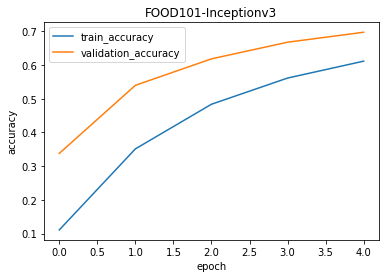

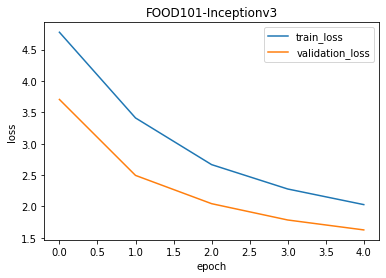

In [ ]:
def plot_accuracy(history,title):#
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')###
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):##
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')



In [ ]:
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

In [ ]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list=labels.txt
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [ ]:
model.predict('/content/ta.jpg')

IndexError: ignored

In [ ]:
images = []
images.append('ta.jpg')
images.append('p.jpg')

img="p.jpg"
predict_class(model_best, images, True)

NameError: ignored

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 3.1 MB/s 


In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "/contents/")
!ls

best_model_3class.hdf5		    food_test_c101_n1000_r32x32x1.h5
food41.zip			    food_test_c101_n1000_r32x32x3.h5
food_c101_n1000_r384x384x3.h5	    food_test_c101_n1000_r64x64x1.h5
food_c101_n10099_r32x32x1.h5	    food_test_c101_n1000_r64x64x3.h5
food_c101_n10099_r32x32x3.h5	    history_110class.log
food_c101_n10099_r64x64x1.h5	    images
food_c101_n10099_r64x64x3.h5	    meta
FoodData			    model_trained_3class.hdf5
food_test_c101_n1000_r128x128x1.h5  sample_data
food_test_c101_n1000_r128x128x3.h5


In [ ]:
tfjs.converters.save_keras_model(model, "/content/meta")